# Set up

In [6]:
import json
from postprocessor_3C import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import subprocess
import time
from os import makedirs
from os.path import isdir, join

# lengths

lengths = [40,50,60,70,80,90,100,120,150,200,500,750,1000]

# scenarios

scenarios = ['DC','DC_elec','Inf_renew_DC','Inf_renew_DC_elec']

# case studies

css = ['ELEC-OFF','ELEC-H$_2$-OFF']

# sensitivity

sensitivity = 'off_zb'


C:\Users\jocel\AppData\Local\Temp\ipykernel_28232\2791033899.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Data import

In [2]:
# Load json files

dictionaries = dict()

for scenario in scenarios:
    dictionaries[scenario] = dict()
    for value in lengths:
        name_file = '3_clusters_Belgium_'+ scenario + '_' + sensitivity + '_' + str(value)
        name_output = name_file
        file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
        with open (file_path, 'r') as myfile:
            data = myfile.read() 
        # parse file
        dictionary_3C = json.loads(data)
        dictionaries[scenario][value] = {}
        dictionaries[scenario][value] = dictionary_3C


# Cost differentiation

## Data collection

In [7]:
# Objectives

objectives = dict()

for scenario in scenarios:
    objectives[scenario] = dict()
    for value in lengths:
        objectives[scenario][value] = dictionaries[scenario][value]['solution']['objective']

# cost difference

cost_difference = dict()
cost_difference['Base'] = dict()
cost_difference['High renew'] = dict()

for value in lengths:
    cost_difference['Base'][value] = objectives['DC_elec'][value] - objectives['DC'][value]
    cost_difference['High renew'][value] = objectives['Inf_renew_DC_elec'][value] - objectives['Inf_renew_DC'][value]
    
print(transform_into_table(cost_difference))

                 40         50         60         70         80         90    \
Base         0.389670   0.684433   1.187943   1.951889   3.211001   4.817924   
High renew  25.533721  26.265154  26.858670  27.383136  28.038940  28.663822   

                 100        120        150        200        500        750   \
Base         6.730303  12.155887  16.567274  20.862941  55.012461  65.580706   
High renew  29.099328  31.108295  32.245608  30.274297  15.494136   1.492972   

                 1000  
Base        53.755142  
High renew   0.000062  


## Graphs 

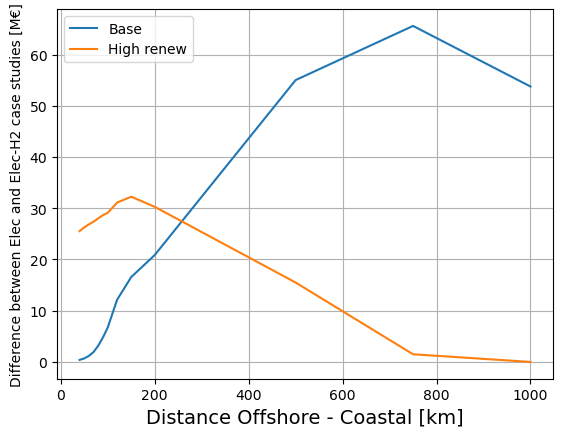

In [8]:
transform_into_table(cost_difference).transpose().plot()
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Difference between Elec and Elec-H2 case studies [M€]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_costs.pdf',dpi=600)
plt.show()

# Cost differentiation in €/MWh

## Data collection

In [9]:
# Objectives

objectives = dict()

for scenario in scenarios:
    objectives[scenario] = dict()
    for value in lengths:
        objectives[scenario][value] = dictionaries[scenario][value]['solution']['objective']

# cost difference

cost_difference = dict()
cost_difference['Base'] = dict()
cost_difference['High renew'] = dict()

for value in lengths:
    cost_difference['Base'][value] = (objectives['DC_elec'][value] - objectives['DC'][value])/226.33
    cost_difference['High renew'][value] = (objectives['Inf_renew_DC_elec'][value] - objectives['Inf_renew_DC'][value])/226.33
    
print(transform_into_table(cost_difference))

                40        50        60        70        80        90    \
Base        0.001722  0.003024  0.005249  0.008624  0.014187  0.021287   
High renew  0.112816  0.116048  0.118670  0.120988  0.123885  0.126646   

                100       120       150       200       500       750   \
Base        0.029737  0.053709  0.073200  0.092179  0.243063  0.289757   
High renew  0.128570  0.137447  0.142472  0.133762  0.068458  0.006596   

                    1000  
Base        2.375078e-01  
High renew  2.733653e-07  


## Graphs 

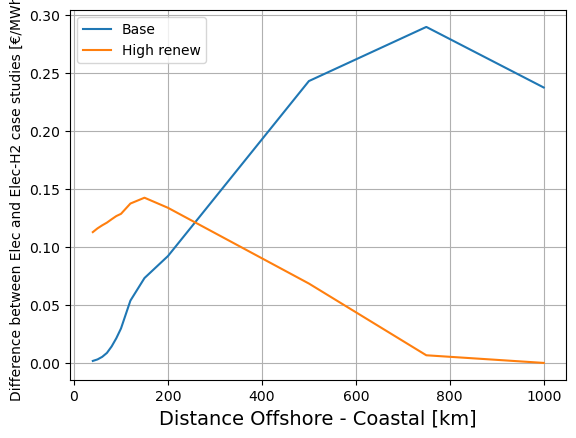

In [10]:
transform_into_table(cost_difference).transpose().plot()
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Difference between Elec and Elec-H2 case studies [€/MWh]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_costs_eur_MWh.pdf',dpi=600)
plt.show()

# Offshore installation

## Base case

### Data collection

In [11]:
scenario = 'DC' 

capa_off = dict()
capa_off[css[0]] = dict()
capa_off[css[1]] = dict()

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE','ELECTROLYSIS_PLANTS','FUEL_CELLS']
variable = 'new_capacity'

capa_off[css[0]][variable] = dict()
capa_off[css[1]][variable] = dict()

for element in elements:
    capa_off[css[0]][variable][element] = dict()
    capa_off[css[1]][variable][element] = dict()
    for value in lengths:
        capa_off[css[0]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_off[css[1]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_off[css[0]][variable]))
print(transform_into_table(capa_off[css[1]][variable]))

                     40    50    60    70    80    90    100   120   150   \
WIND_OFFSHORE         8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   
ELECTROLYSIS_PLANTS   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUEL_CELLS            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                     200   500   750   1000  
WIND_OFFSHORE         8.0   7.2  5.26  3.26  
ELECTROLYSIS_PLANTS   0.0   0.0  0.00  0.00  
FUEL_CELLS            0.0   0.0  0.00  0.00  
                     40    50    60    70    80    90    100   120   150   \
WIND_OFFSHORE        8.00  8.00  8.00  8.00  8.00  8.00  8.00  8.00  8.00   
ELECTROLYSIS_PLANTS  0.07  0.09  0.11  0.19  0.28  0.33  0.42  0.62  0.74   
FUEL_CELLS           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                     200   500   750   1000  
WIND_OFFSHORE        8.00  8.00   8.0  6.90  
ELECTROLYSIS_PLANTS  0.85  1.51   1.9  1.81  
FUEL_CELLS           0.00  0.00   0.0  0.00  


### Graphs

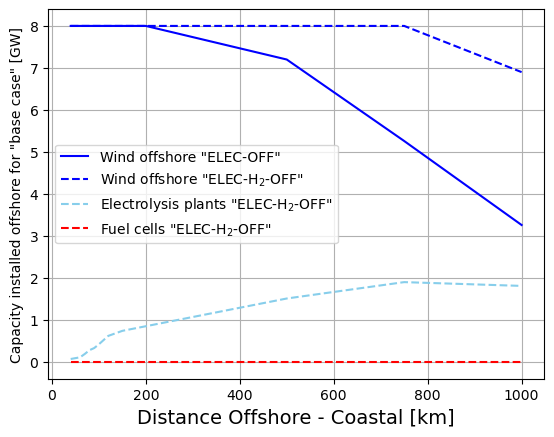

In [12]:
graph_capa_off = dict()

for cs in css:
    graph_capa_off['Wind offshore "' + cs +'"'] = dict()
    if cs == css[1]:
        graph_capa_off['Electrolysis plants "' + cs +'"'] = dict()
        graph_capa_off['Fuel cells "' + cs +'"'] = dict()
    for value in lengths: 
        graph_capa_off['Wind offshore "' + cs +'"'][value] = capa_off[cs][variable]['WIND_OFFSHORE'][value]
        if cs == css[1]:
            graph_capa_off['Electrolysis plants "' + cs +'"'][value] = capa_off[cs][variable]['ELECTROLYSIS_PLANTS'][value]
            graph_capa_off['Fuel cells "' + cs +'"'][value] = capa_off[cs][variable]['FUEL_CELLS'][value]

df = transform_into_table(graph_capa_off).transpose()
ax = df.plot(style=['-', '--', '--','--'], color=['b', 'b', 'skyblue', 'r'])
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "base case" [GW]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_off_cap_' + scenario + '.pdf',dpi=600)
plt.show()
        

## High renew

### Data collection

In [13]:
scenario = 'Inf_renew_DC' 

capa_off = dict()
capa_off[css[0]] = dict()
capa_off[css[1]] = dict()

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE','ELECTROLYSIS_PLANTS','FUEL_CELLS']
variable = 'new_capacity'

capa_off[css[0]][variable] = dict()
capa_off[css[1]][variable] = dict()

for element in elements:
    capa_off[css[0]][variable][element] = dict()
    capa_off[css[1]][variable][element] = dict()
    for value in lengths:
        capa_off[css[0]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_off[css[1]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_off[css[0]][variable]))
print(transform_into_table(capa_off[css[1]][variable]))

                     40    50    60    70    80    90    100   120   150   \
WIND_OFFSHORE        7.09  6.57  6.06  5.64  5.14  4.65  4.13  3.35  2.83   
ELECTROLYSIS_PLANTS  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
FUEL_CELLS           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                     200   500   750   1000  
WIND_OFFSHORE        2.38  0.61   0.0   0.0  
ELECTROLYSIS_PLANTS  0.00  0.00   0.0   0.0  
FUEL_CELLS           0.00  0.00   0.0   0.0  
                     40    50    60    70    80    90    100   120   150   \
WIND_OFFSHORE        9.30  8.68  8.27  7.76  7.44  6.96  6.56  5.85  5.51   
ELECTROLYSIS_PLANTS  1.64  1.58  1.59  1.52  1.52  1.48  1.48  1.49  1.47   
FUEL_CELLS           0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                     200   500   750   1000  
WIND_OFFSHORE        4.74  2.05  0.80   0.0  
ELECTROLYSIS_PLANTS  1.32  0.60  0.25   0.0  
FUEL_CELLS           0.00  0.00  0.00   0.0  


### Graphs

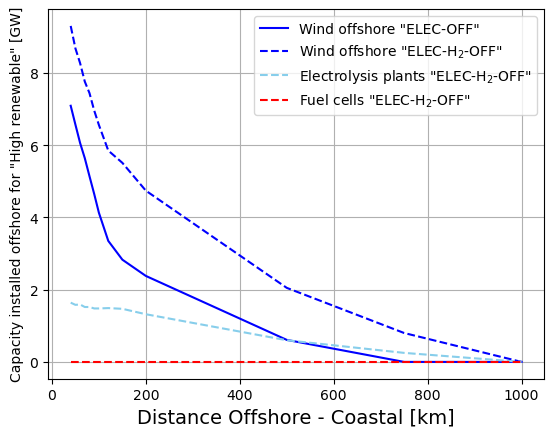

In [14]:
graph_capa_off = dict()

for cs in css:
    graph_capa_off['Wind offshore "' + cs +'"'] = dict()
    if cs == css[1]:
        graph_capa_off['Electrolysis plants "' + cs +'"'] = dict()
        graph_capa_off['Fuel cells "' + cs +'"'] = dict()
    for value in lengths: 
        graph_capa_off['Wind offshore "' + cs +'"'][value] = capa_off[cs][variable]['WIND_OFFSHORE'][value]
        if cs == css[1]:
            graph_capa_off['Electrolysis plants "' + cs +'"'][value] = capa_off[cs][variable]['ELECTROLYSIS_PLANTS'][value]
            graph_capa_off['Fuel cells "' + cs +'"'][value] = capa_off[cs][variable]['FUEL_CELLS'][value]

df = transform_into_table(graph_capa_off).transpose()
ax = df.plot(style=['-', '--', '--','--'], color=['b', 'b', 'skyblue', 'r'])
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "High renewable" [GW]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_off_cap_' + scenario + '.pdf',dpi=600)
plt.show()

#  Interconnection installation

## Base case

### Data collection

In [15]:
scenario = 'DC' 

capa_inter = dict()
capa_inter[css[0]] = dict()
capa_inter[css[1]] = dict()

clusters = ['HV_OFF_ZB','HV_ZB_INL','HVDC_OFF_ZB']
variable = 'new_capacity'

capa_inter[css[0]][variable] = dict()
capa_inter[css[1]][variable] = dict()

for cluster in clusters:
    capa_inter[css[0]][variable][cluster] = dict()
    capa_inter[css[1]][variable][cluster] = dict()
    for value in lengths:
        capa_inter[css[0]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inter[css[1]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity_forward'

capa_inter[css[0]][variable] = dict()
capa_inter[css[1]][variable] = dict()

for cluster in clusters:
    capa_inter[css[0]][variable][cluster] = dict()
    capa_inter[css[1]][variable][cluster] = dict()
    for value in lengths:
        capa_inter[css[0]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inter[css[1]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)
        
        
print(transform_into_table(capa_inter[css[0]]['new_capacity']))
print(transform_into_table(capa_inter[css[0]]['new_capacity_forward']))
print(transform_into_table(capa_inter[css[1]]['new_capacity']))
print(transform_into_table(capa_inter[css[1]]['new_capacity_forward']))

             40    50    60    70    80    90    100   120   150   200   500   \
HV_OFF_ZB    6.67  6.39  5.97  5.59  5.19  4.54  3.85  1.50  0.00  0.00  0.00   
HV_ZB_INL    3.57  3.58  3.60  3.61  3.63  3.64  3.66  3.70  3.72  3.71  2.96   
HVDC_OFF_ZB  0.20  0.61  1.01  1.37  1.76  2.37  3.03  5.26  6.70  6.64  5.84   

             750   1000  
HV_OFF_ZB    0.00  0.00  
HV_ZB_INL    1.96  0.94  
HVDC_OFF_ZB  4.23  2.62  
                40    50    60    70    80    90    100   120   150   200   \
PIPE_H2_OFF_ZB  0.00  0.00  0.00   0.0  0.00  0.00  0.00  0.00  0.00  0.00   
PIPE_H2_ZB_INL  1.07  1.08  1.09   1.1  1.11  1.12  1.13  1.11  1.12  1.11   

                500   750   1000  
PIPE_H2_OFF_ZB  0.00  0.00   0.0  
PIPE_H2_ZB_INL  0.89  0.28   0.0  
             40    50    60    70    80    90    100   120   150   200   500   \
HV_OFF_ZB    6.67  6.29  5.83  5.35  4.83  4.14  3.31  0.62  0.00  0.00  0.00   
HV_ZB_INL    3.55  3.54  3.55  3.49  3.39  3.35  3.29  3.23  3.20  3.

### Graphs

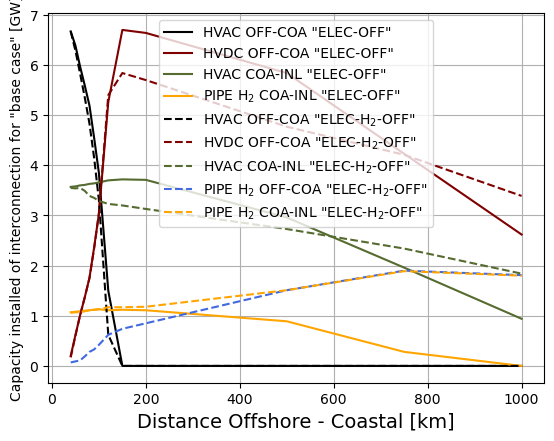

In [16]:
graph_capa_inter = dict()

for cs in css:
    graph_capa_inter['HVAC OFF-COA "' + cs +'"'] = dict()
    graph_capa_inter['HVDC OFF-COA "' + cs +'"'] = dict()
    graph_capa_inter['HVAC COA-INL "' + cs +'"'] = dict()
    if cs == css[1]:
        graph_capa_inter['PIPE H$_2$ OFF-COA "' + cs +'"'] = dict()
    graph_capa_inter['PIPE H$_2$ COA-INL "' + cs +'"'] = dict()
    for value in lengths: 
        variable = 'new_capacity'
        graph_capa_inter['HVAC OFF-COA "' + cs +'"'][value] = capa_inter[cs][variable]['HV_OFF_ZB'][value]
        graph_capa_inter['HVDC OFF-COA "' + cs +'"'][value] = capa_inter[cs][variable]['HVDC_OFF_ZB'][value]
        graph_capa_inter['HVAC COA-INL "' + cs +'"'][value] = capa_inter[cs][variable]['HV_ZB_INL'][value]
        variable = 'new_capacity_forward'
        if cs == css[1]:
            graph_capa_inter['PIPE H$_2$ OFF-COA "' + cs +'"'][value] = capa_inter[cs][variable]['PIPE_H2_OFF_ZB'][value]
        graph_capa_inter['PIPE H$_2$ COA-INL "' + cs +'"'][value] = capa_inter[cs][variable]['PIPE_H2_ZB_INL'][value]
        
df = transform_into_table(graph_capa_inter).transpose()
ax = df.plot(style=['-'] * 4 + ['--'] * 5, color=['black', 'maroon', 'darkolivegreen', 'orange', 'black', 'maroon', 'darkolivegreen','royalblue','orange',])
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Capacity installed of interconnection for "base case" [GW]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_inter_cap_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection

In [17]:
scenario = 'Inf_renew_DC' 

capa_inter = dict()
capa_inter[css[0]] = dict()
capa_inter[css[1]] = dict()

clusters = ['HV_OFF_ZB','HV_ZB_INL','HVDC_OFF_ZB']
variable = 'new_capacity'

capa_inter[css[0]][variable] = dict()
capa_inter[css[1]][variable] = dict()

for cluster in clusters:
    capa_inter[css[0]][variable][cluster] = dict()
    capa_inter[css[1]][variable][cluster] = dict()
    for value in lengths:
        capa_inter[css[0]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inter[css[1]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)

clusters = ['PIPE_H2_OFF_ZB','PIPE_H2_ZB_INL']
variable = 'new_capacity_forward'

capa_inter[css[0]][variable] = dict()
capa_inter[css[1]][variable] = dict()

for cluster in clusters:
    capa_inter[css[0]][variable][cluster] = dict()
    capa_inter[css[1]][variable][cluster] = dict()
    for value in lengths:
        capa_inter[css[0]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inter[css[1]][variable][cluster][value] = round(get_cluster_variable(cluster,variable,dictionaries[scenario][value])['values'][0],2)
        
        
print(transform_into_table(capa_inter[css[0]]['new_capacity']))
print(transform_into_table(capa_inter[css[0]]['new_capacity_forward']))
print(transform_into_table(capa_inter[css[1]]['new_capacity']))
print(transform_into_table(capa_inter[css[1]]['new_capacity_forward']))

             40    50    60    70    80    90    100   120   150   200   500   \
HV_OFF_ZB    5.99  5.36  4.60  3.97  3.37  2.78  2.14  1.06  0.00  0.00  0.00   
HV_ZB_INL    2.34  2.04  1.76  1.49  1.31  1.11  0.95  0.72  0.54  0.34  0.00   
HVDC_OFF_ZB  0.09  0.24  0.51  0.77  0.91  1.08  1.27  1.68  2.30  1.93  0.48   

             750   1000  
HV_OFF_ZB     0.0   0.0  
HV_ZB_INL     0.0   0.0  
HVDC_OFF_ZB   0.0   0.0  
                40    50    60    70    80    90    100   120   150   200   \
PIPE_H2_OFF_ZB  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
PIPE_H2_ZB_INL  3.68  3.41  3.12  2.83  2.55  2.31  2.18  1.91  1.78  1.69   

                500   750   1000  
PIPE_H2_OFF_ZB   0.0  0.00  0.00  
PIPE_H2_ZB_INL   0.9  0.56  0.56  
             40    50    60    70    80    90    100   120   150   200   500   \
HV_OFF_ZB    5.75  5.18  4.51  3.79  3.19  2.59  1.89  0.46  0.00  0.00  0.00   
HV_ZB_INL    2.64  2.47  2.31  2.12  2.03  1.86  1.73  1.47  1.36  1.

### Graphs

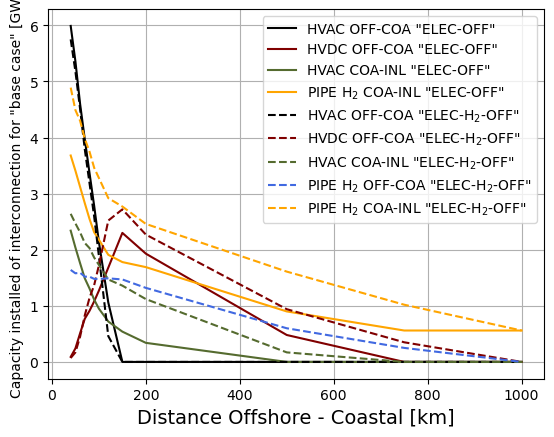

In [18]:
graph_capa_inter = dict()

for cs in css:
    graph_capa_inter['HVAC OFF-COA "' + cs +'"'] = dict()
    graph_capa_inter['HVDC OFF-COA "' + cs +'"'] = dict()
    graph_capa_inter['HVAC COA-INL "' + cs +'"'] = dict()
    if cs == css[1]:
        graph_capa_inter['PIPE H$_2$ OFF-COA "' + cs +'"'] = dict()
    graph_capa_inter['PIPE H$_2$ COA-INL "' + cs +'"'] = dict()
    for value in lengths: 
        variable = 'new_capacity'
        graph_capa_inter['HVAC OFF-COA "' + cs +'"'][value] = capa_inter[cs][variable]['HV_OFF_ZB'][value]
        graph_capa_inter['HVDC OFF-COA "' + cs +'"'][value] = capa_inter[cs][variable]['HVDC_OFF_ZB'][value]
        graph_capa_inter['HVAC COA-INL "' + cs +'"'][value] = capa_inter[cs][variable]['HV_ZB_INL'][value]
        variable = 'new_capacity_forward'
        if cs == css[1]:
            graph_capa_inter['PIPE H$_2$ OFF-COA "' + cs +'"'][value] = capa_inter[cs][variable]['PIPE_H2_OFF_ZB'][value]
        graph_capa_inter['PIPE H$_2$ COA-INL "' + cs +'"'][value] = capa_inter[cs][variable]['PIPE_H2_ZB_INL'][value]

        
df = transform_into_table(graph_capa_inter).transpose()
ax = df.plot(style=['-'] * 4 + ['--'] * 5, color=['black', 'maroon', 'darkolivegreen', 'orange', 'black', 'maroon', 'darkolivegreen','royalblue','orange'])
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Capacity installed of interconnection for "base case" [GW]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_inter_cap_' + scenario + '.pdf',dpi=600)
plt.show()

# Production hydrogen

## Base case

### Data collection

In [19]:
scenario = 'DC' 

prod_h2 = dict()
prod_h2[css[0]] = dict()
prod_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_h2[css[0]][variable] = dict()
prod_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        prod_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'
prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
for value in lengths:
    prod_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(prod_h2[css[0]][variable]))
print(transform_into_table(prod_h2[css[1]][variable]))

                                 40       50       60       70       80    \
OFFSHORE ELECTROLYSIS_PLANTS      0.0     0.00     0.00     0.00     0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1712.4  1725.65  1743.63  1750.96  1771.92   
INLAND ELECTROLYSIS_PLANTS        0.0     0.00     0.00     0.00     0.00   
INLAND SMR                        0.0     0.00     0.00     0.00     0.00   

                                  90       100      120      150     200   \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00     0.00     0.0   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1792.85  1800.53  1791.35  1811.19  1786.1   
INLAND ELECTROLYSIS_PLANTS        0.00     0.00     0.00     0.00     0.0   
INLAND SMR                        0.00     0.00     0.00     0.00     0.0   

                                  500     750   1000  
OFFSHORE ELECTROLYSIS_PLANTS      0.00    0.00   0.0  
ZEEBRUGGE ELECTROLYSIS_PLANTS  1382.14  401.61   0.0  
INLAND ELECTROLYSIS_PLANTS        0.00    0.00   0.0  
INLAND S

### Graphs

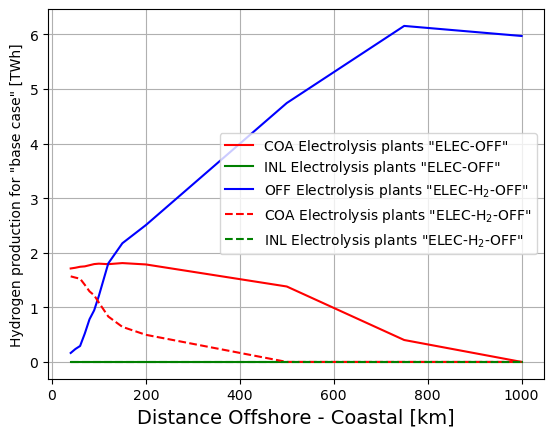

In [20]:
graph_prod_h2 = dict()

element = 'ELECTROLYSIS_PLANTS'

for cs in css:
    if cs == css[1]:
        graph_prod_h2['OFF Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['COA Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['INL Electrolysis plants "' + cs +'"'] = dict()
    #graph_prod_h2['Steam methane reformers "' + cs +'"'] = dict()
    for value in lengths: 
        if cs == css[1]:
            graph_prod_h2['OFF Electrolysis plants "' + cs +'"'][value] = prod_h2[cs][variable]['OFFSHORE' + ' ' + element][value]/1000
        graph_prod_h2['COA Electrolysis plants "' + cs +'"'][value] = prod_h2[cs][variable]['ZEEBRUGGE' + ' ' + element][value]/1000
        graph_prod_h2['INL Electrolysis plants "' + cs +'"'][value] = prod_h2[cs][variable]['INLAND' + ' ' + element][value]/1000
        #graph_prod_h2['Steam methane reformers "' + cs +'"'][value] = prod_h2[cs][variable]['INLAND' + ' ' + 'SMR'][value]
        
        
df = transform_into_table(graph_prod_h2).transpose()
ax = df.plot(style=['-'] * 3 + ['--'] * 3, color=['r', 'g', 'blue']*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Hydrogen production for "base case" [TWh]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_h2_prod_' + scenario + '.pdf',dpi=600)
plt.show()
        

## High renew

### Data collection

In [21]:
scenario = 'Inf_renew_DC' 

prod_h2 = dict()
prod_h2[css[0]] = dict()
prod_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_h2[css[0]][variable] = dict()
prod_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        prod_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'
prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
for value in lengths:
    prod_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(prod_h2[css[0]][variable]))
print(transform_into_table(prod_h2[css[1]][variable]))

                                  40       50       60       70       80    \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00     0.00     0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  8082.35  7409.11  6738.72  6064.75  5396.91   
INLAND ELECTROLYSIS_PLANTS      234.40   359.85   541.37   734.48   826.72   
INLAND SMR                        0.00     0.00     0.00     0.00     0.00   

                                  90       100      120      150      200   \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00     0.00     0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  4829.60  4430.17  3731.11  3372.89  3100.69   
INLAND ELECTROLYSIS_PLANTS      931.77   880.53   871.27   679.95   478.61   
INLAND SMR                        0.00     0.00     0.00     0.00     0.00   

                                  500     750     1000  
OFFSHORE ELECTROLYSIS_PLANTS      0.00    0.00    0.00  
ZEEBRUGGE ELECTROLYSIS_PLANTS  1493.14  880.29  879.71  
INLAND ELECTROLYSIS_PLANTS      352.86  653.62 

### Graphs

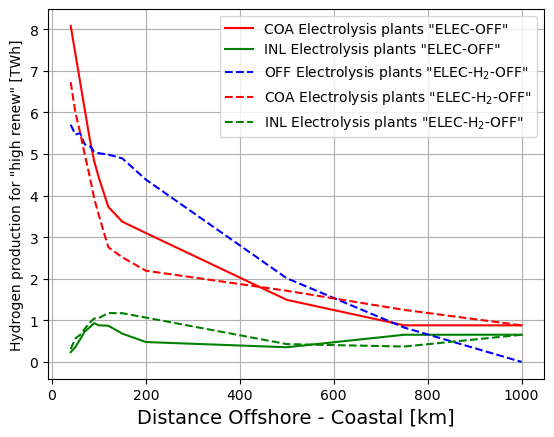

In [22]:
graph_prod_h2 = dict()

element = 'ELECTROLYSIS_PLANTS'
for cs in css:
    if cs == css[1]:
        graph_prod_h2['OFF Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['COA Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['INL Electrolysis plants "' + cs +'"'] = dict()
    #graph_prod_h2['Steam methane reformers "' + cs +'"'] = dict()
    for value in lengths: 
        if cs == css[1]:
            graph_prod_h2['OFF Electrolysis plants "' + cs +'"'][value] = prod_h2[cs][variable]['OFFSHORE' + ' ' + element][value]/1000
        graph_prod_h2['COA Electrolysis plants "' + cs +'"'][value] = prod_h2[cs][variable]['ZEEBRUGGE' + ' ' + element][value]/1000
        graph_prod_h2['INL Electrolysis plants "' + cs +'"'][value] = prod_h2[cs][variable]['INLAND' + ' ' + element][value]/1000
        #graph_prod_h2['Steam methane reformers "' + cs +'"'][value] = prod_h2[cs][variable]['INLAND' + ' ' + 'SMR'][value]

        
df = transform_into_table(graph_prod_h2).transpose()
ax = df.plot(style=['-'] * 2 + ['--'] * 3, color=['r', 'g', 'blue']*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Hydrogen production for "high renew" [TWh]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_h2_prod_' + scenario + '.pdf',dpi=600)
plt.show()
        

# Production vs import H2 

## Base case 

### Data collection

In [23]:
scenario = 'DC' 

prod_imp_h2 = dict()
prod_imp_h2[css[0]] = dict()
prod_imp_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        prod_imp_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_imp_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in lengths:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable = 'imported'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in lengths:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

    
print(transform_into_table(prod_imp_h2[css[0]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[0]]['imported']))
print(transform_into_table(prod_imp_h2[css[1]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[1]]['imported']))

                                 40       50       60       70       80    \
OFFSHORE ELECTROLYSIS_PLANTS      0.0     0.00     0.00     0.00     0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1712.4  1725.65  1743.63  1750.96  1771.92   
INLAND ELECTROLYSIS_PLANTS        0.0     0.00     0.00     0.00     0.00   
INLAND SMR                        0.0     0.00     0.00     0.00     0.00   

                                  90       100      120      150     200   \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00     0.00     0.0   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1792.85  1800.53  1791.35  1811.19  1786.1   
INLAND ELECTROLYSIS_PLANTS        0.00     0.00     0.00     0.00     0.0   
INLAND SMR                        0.00     0.00     0.00     0.00     0.0   

                                  500     750   1000  
OFFSHORE ELECTROLYSIS_PLANTS      0.00    0.00   0.0  
ZEEBRUGGE ELECTROLYSIS_PLANTS  1382.14  401.61   0.0  
INLAND ELECTROLYSIS_PLANTS        0.00    0.00   0.0  
INLAND S

### Graph

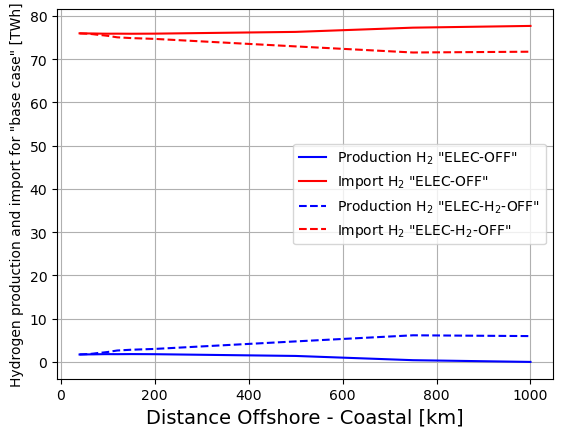

In [24]:
graph_prod_imp_h2 = dict()

for cs in css:
    graph_prod_imp_h2['Production H$_2$ "' + cs +'"'] = dict()
    graph_prod_imp_h2['Import H$_2$ "' + cs +'"'] = dict()
    for value in lengths: 
        graph_prod_imp_h2['Production H$_2$ "' + cs +'"'][value] = sum(prod_imp_h2[cs]['h2_produced'][i][value] for i in prod_imp_h2[cs]['h2_produced'])/1000
        graph_prod_imp_h2['Import H$_2$ "' + cs +'"'][value] = prod_imp_h2[cs]['imported']['INLAND H2_INTERCONNECTION_NL'][value]/1000
        
colors =  ['b', 'r']
nb_var = 2

df = transform_into_table(graph_prod_imp_h2).transpose()
ax = df.plot(style=['-'] * nb_var + ['--'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Hydrogen production and import for "base case" [TWh]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_h2_pr_vs_imp_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection

In [25]:
scenario = 'Inf_renew_DC' 

prod_imp_h2 = dict()
prod_imp_h2[css[0]] = dict()
prod_imp_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        prod_imp_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_imp_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in lengths:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable = 'imported'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in lengths:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

    
print(transform_into_table(prod_imp_h2[css[0]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[0]]['imported']))
print(transform_into_table(prod_imp_h2[css[1]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[1]]['imported']))

                                  40       50       60       70       80    \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00     0.00     0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  8082.35  7409.11  6738.72  6064.75  5396.91   
INLAND ELECTROLYSIS_PLANTS      234.40   359.85   541.37   734.48   826.72   
INLAND SMR                        0.00     0.00     0.00     0.00     0.00   

                                  90       100      120      150      200   \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00     0.00     0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  4829.60  4430.17  3731.11  3372.89  3100.69   
INLAND ELECTROLYSIS_PLANTS      931.77   880.53   871.27   679.95   478.61   
INLAND SMR                        0.00     0.00     0.00     0.00     0.00   

                                  500     750     1000  
OFFSHORE ELECTROLYSIS_PLANTS      0.00    0.00    0.00  
ZEEBRUGGE ELECTROLYSIS_PLANTS  1493.14  880.29  879.71  
INLAND ELECTROLYSIS_PLANTS      352.86  653.62 

### Graph

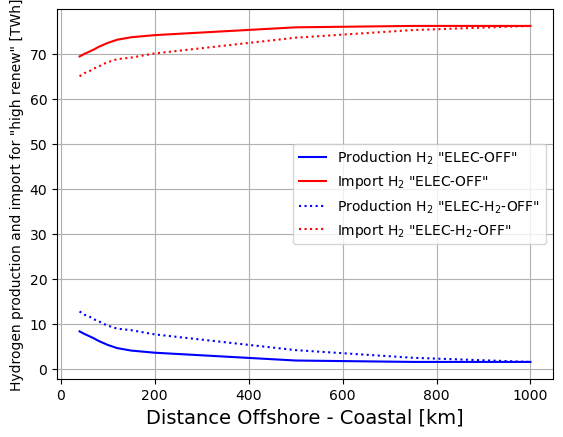

In [26]:
graph_prod_imp_h2 = dict()

for cs in css:
    graph_prod_imp_h2['Production H$_2$ "' + cs +'"'] = dict()
    graph_prod_imp_h2['Import H$_2$ "' + cs +'"'] = dict()
    for value in lengths: 
        graph_prod_imp_h2['Production H$_2$ "' + cs +'"'][value] = sum(prod_imp_h2[cs]['h2_produced'][i][value] for i in prod_imp_h2[cs]['h2_produced'])/1000
        graph_prod_imp_h2['Import H$_2$ "' + cs +'"'][value] = prod_imp_h2[cs]['imported']['INLAND H2_INTERCONNECTION_NL'][value]/1000
        
        
#colors = ['black', 'gray', 'blue', 'silver', 'royalblue']
colors = ['b','r']
nb_var = 2

df = transform_into_table(graph_prod_imp_h2).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Hydrogen production and import for "high renew" [TWh]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_h2_pr_vs_imp_' + scenario + '.pdf',dpi=600)
plt.show()

# Inland installation

## Base case

### Data collection 

In [27]:
scenario = 'DC' 

capa_inl = dict()
capa_inl[css[0]] = dict()
capa_inl[css[1]] = dict()

cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE','FUEL_CELLS']
variable = 'new_capacity'

capa_inl[css[0]][variable] = dict()
capa_inl[css[1]][variable] = dict()

for element in elements:
    capa_inl[css[0]][variable][element] = dict()
    capa_inl[css[1]][variable][element] = dict()
    for value in lengths:
        capa_inl[css[0]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inl[css[1]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_inl[css[0]][variable]))
print(transform_into_table(capa_inl[css[1]][variable]))

               40     50     60     70     80     90     100    120    150   \
PV            28.31  28.28  28.29  28.27  28.26  28.27  28.28  28.29  28.29   
CCGT          11.90  11.88  11.87  11.86  11.85  11.83  11.81  11.79  11.79   
WIND_ONSHORE   9.00   9.00   9.00   9.00   9.00   9.00   9.00   9.00   9.00   
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

               200    500    750    1000  
PV            28.27  28.11  28.22  28.45  
CCGT          11.79  12.06  12.39  12.73  
WIND_ONSHORE   9.00   9.00   9.00   9.00  
FUEL_CELLS     0.00   0.00   0.00   0.00  
               40     50     60     70     80     90     100    120    150   \
PV            28.31  28.27  28.28  28.27  28.25  28.22  28.18  28.19  28.15   
CCGT          11.90  11.89  11.87  11.86  11.85  11.83  11.83  11.82  11.84   
WIND_ONSHORE   9.00   9.00   9.00   9.00   9.00   9.00   9.00   9.00   9.00   
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.

### Graph

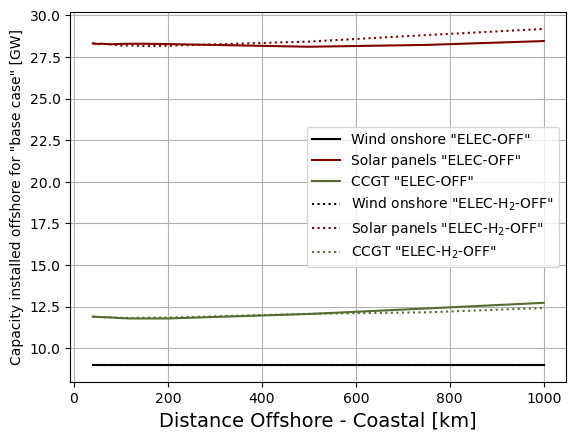

In [28]:
graph_capa_inl = dict()

for cs in css:
    graph_capa_inl['Wind onshore "' + cs +'"'] = dict()
    graph_capa_inl['Solar panels "' + cs +'"'] = dict()
    graph_capa_inl['CCGT "' + cs +'"'] = dict()
    for value in lengths: 
        graph_capa_inl['Wind onshore "' + cs +'"'][value] = capa_inl[cs][variable]['WIND_ONSHORE'][value]
        graph_capa_inl['Solar panels "' + cs +'"'][value] = capa_inl[cs][variable]['PV'][value]
        graph_capa_inl['CCGT "' + cs +'"'][value] = capa_inl[cs][variable]['CCGT'][value]

colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_capa_inl).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "base case" [GW]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_inl_cap_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection 

In [29]:
scenario = 'Inf_renew_DC' 

capa_inl = dict()
capa_inl[css[0]] = dict()
capa_inl[css[1]] = dict()

cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE','FUEL_CELLS']
variable = 'new_capacity'

capa_inl[css[0]][variable] = dict()
capa_inl[css[1]][variable] = dict()

for element in elements:
    capa_inl[css[0]][variable][element] = dict()
    capa_inl[css[1]][variable][element] = dict()
    for value in lengths:
        capa_inl[css[0]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inl[css[1]][variable][element][value] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_inl[css[0]][variable]))
print(transform_into_table(capa_inl[css[1]][variable]))

               40     50     60     70     80     90     100    120    150   \
PV            28.27  28.27  28.09  27.97  27.86  27.77  27.68  27.47  27.30   
CCGT          11.04  11.11  11.30  11.36  11.53  11.72  11.87  12.08  12.16   
WIND_ONSHORE  20.50  20.50  20.50  20.50  20.50  20.50  20.50  20.50  20.50   
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

               200    500    750    1000  
PV            27.15  27.04  26.85  26.85  
CCGT          12.26  12.46  12.55  12.55  
WIND_ONSHORE  20.50  20.50  20.50  20.50  
FUEL_CELLS     0.00   0.00   0.00   0.00  
               40     50     60     70     80     90     100    120    150   \
PV            28.42  28.34  28.32  28.30  28.27  28.21  28.15  27.98  27.83   
CCGT          10.91  10.99  11.03  11.09  11.12  11.18  11.25  11.42  11.58   
WIND_ONSHORE  20.50  20.50  20.50  20.50  20.50  20.50  20.50  20.50  20.50   
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.

### Graph

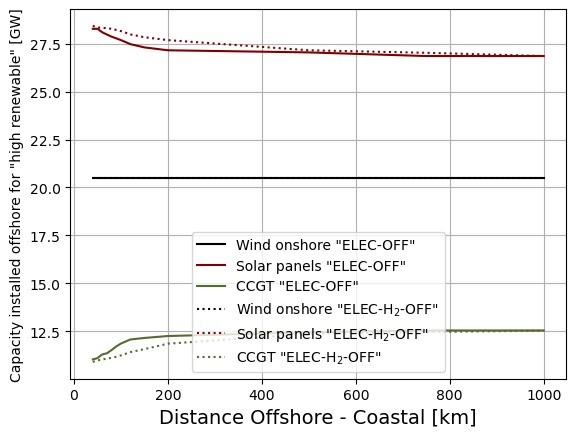

In [30]:
graph_capa_inl = dict()

for cs in css:
    graph_capa_inl['Wind onshore "' + cs +'"'] = dict()
    graph_capa_inl['Solar panels "' + cs +'"'] = dict()
    graph_capa_inl['CCGT "' + cs +'"'] = dict()
    for value in lengths: 
        graph_capa_inl['Wind onshore "' + cs +'"'][value] = capa_inl[cs][variable]['WIND_ONSHORE'][value]
        graph_capa_inl['Solar panels "' + cs +'"'][value] = capa_inl[cs][variable]['PV'][value]
        graph_capa_inl['CCGT "' + cs +'"'][value] = capa_inl[cs][variable]['CCGT'][value]

colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_capa_inl).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "high renewable" [GW]', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_inl_cap_' + scenario + '.pdf',dpi=600)
plt.show()

# Gas import and CO2 export

## Base case

### Data collection

In [31]:
scenario = 'DC'

gaz_imp_exp = dict()
gaz_imp_exp[css[0]] = dict() 
gaz_imp_exp[css[1]] = dict() 

variable = 'imported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

cluster = 'ZEEBRUGGE'
elements = ['NG_INTERCONNECTION_NV','NG_INTERCONNECTION_NV','NG_INTERCONNECTION_FR','REGAS_GREEN']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)
        
cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

variable = 'exported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

element = 'CO2_EXPORT'

gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()

for value in lengths:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(gaz_imp_exp[css[0]]['imported']))
print(transform_into_table(gaz_imp_exp[css[0]]['exported']))
print(transform_into_table(gaz_imp_exp[css[1]]['imported']))
print(transform_into_table(gaz_imp_exp[css[1]]['exported']))

                                     40        50        60        70    \
ZEEBRUGGE NG_INTERCONNECTION_NV      0.02      0.02      0.01      0.01   
ZEEBRUGGE NG_INTERCONNECTION_FR  78757.82  78726.68  78694.24  78668.60   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     28906.19  28749.13  28597.53  28483.56   

                                     80        90        100       120   \
ZEEBRUGGE NG_INTERCONNECTION_NV      0.01      0.00      0.01      0.01   
ZEEBRUGGE NG_INTERCONNECTION_FR  78649.06  78605.73  78566.18  78503.99   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     28384.07  28225.89  28063.33  27695.31   

                                     150       200       500       750   \
ZEEBRUGGE NG_INTERCONNE

### Graph

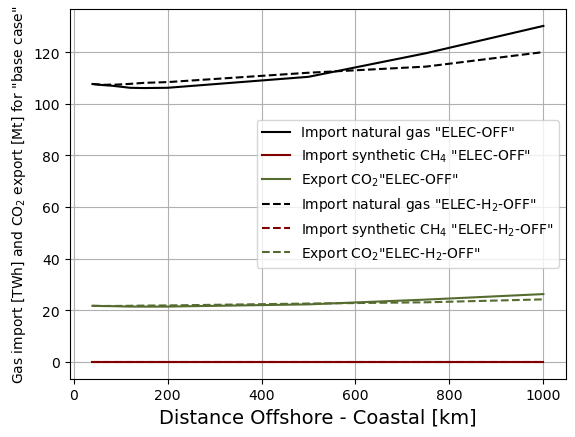

In [32]:
graph_gaz_imp_exp = dict()

for cs in css:
    graph_gaz_imp_exp['Import natural gas "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'] = dict()
    for value in lengths: 
        graph_gaz_imp_exp['Import natural gas "' + cs +'"'][value] = sum(gaz_imp_exp[cs]['imported'][i][value] for i in gaz_imp_exp[cs]['imported'])/1000 - gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value]/1000
        graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'][value] = gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value]/1000
        graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'][value] = gaz_imp_exp[cs]['exported']['INLAND CO2_EXPORT'][value]/1000
    
colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_gaz_imp_exp).transpose()
ax = df.plot(style=['-'] * nb_var + ['--'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Gas import [TWh] and CO$_2$ export [Mt] for "base case"', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_imp_exp_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection

In [33]:
scenario = 'Inf_renew_DC'

gaz_imp_exp = dict()
gaz_imp_exp[css[0]] = dict() 
gaz_imp_exp[css[1]] = dict() 

variable = 'imported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

cluster = 'ZEEBRUGGE'
elements = ['NG_INTERCONNECTION_NV','NG_INTERCONNECTION_NV','NG_INTERCONNECTION_FR','REGAS_GREEN']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)
        
cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in lengths:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

variable = 'exported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

element = 'CO2_EXPORT'

gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()

for value in lengths:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(gaz_imp_exp[css[0]]['imported']))
print(transform_into_table(gaz_imp_exp[css[0]]['exported']))
print(transform_into_table(gaz_imp_exp[css[1]]['imported']))
print(transform_into_table(gaz_imp_exp[css[1]]['exported']))

                                     40        50        60        70    \
ZEEBRUGGE NG_INTERCONNECTION_NV      0.01      0.01      0.01      0.02   
ZEEBRUGGE NG_INTERCONNECTION_FR  75903.29  76277.71  76861.02  77116.37   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     14598.12  15878.59  17229.49  18296.08   

                                     80        90        100       120   \
ZEEBRUGGE NG_INTERCONNECTION_NV      0.01      0.01      0.01      0.02   
ZEEBRUGGE NG_INTERCONNECTION_FR  77603.14  78068.26  78454.02  78992.42   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     19455.90  20761.14  22130.82  24389.09   

                                     150       200       500       750   \
ZEEBRUGGE NG_INTERCONNE

### Graph

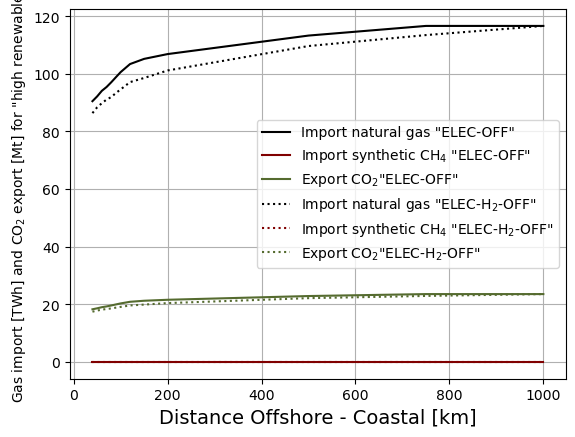

In [34]:
graph_gaz_imp_exp = dict()

for cs in css:
    graph_gaz_imp_exp['Import natural gas "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'] = dict()
    for value in lengths: 
        graph_gaz_imp_exp['Import natural gas "' + cs +'"'][value] = sum(gaz_imp_exp[cs]['imported'][i][value] for i in gaz_imp_exp[cs]['imported'])/1000 - gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value]/1000
        graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'][value] = gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value]/1000
        graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'][value] = gaz_imp_exp[cs]['exported']['INLAND CO2_EXPORT'][value]/1000
        
colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_gaz_imp_exp).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('Distance Offshore - Coastal [km]', fontsize = 14)
plt.ylabel('Gas import [TWh] and CO$_2$ export [Mt] for "high renewable"', fontsize = 10)
plt.grid(True)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'dist_imp_exp_' + scenario + '.pdf',dpi=600)
plt.show()